In [204]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
ds = pd.read_csv(r'ready_for_nn.csv')

In [207]:
df.shape

(1338, 7)

In [208]:
ids = [0, 2, 3, 6]

In [209]:
categorical = [1, 4, 5]

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
df = ds.copy()

In [212]:
scaler = StandardScaler()
df.iloc[:, ids] = scaler.fit_transform(df.iloc[:, ids])

In [213]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [215]:
y_data = torch.Tensor(y_train.astype("int"))
x_data = torch.Tensor(x_train.astype("int"))

In [216]:
x_data = x_data.type(torch.FloatTensor)

In [217]:
y_data = y_data.type(torch.FloatTensor)

In [218]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(6, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [219]:
model = LinearModel()

In [220]:
critetion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [221]:
for epoch in range(40):
    model.train()
    pred_y = model(x_data)
    loss = critetion(pred_y, y_data)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

C:\Users\Azamat.Ilyasov\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1070])) that is different to the input size (torch.Size([1070, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 0.6424748301506042
epoch 1, loss 0.6377177238464355
epoch 2, loss 0.6330752968788147
epoch 3, loss 0.6285398602485657
epoch 4, loss 0.6241050362586975
epoch 5, loss 0.6197652816772461
epoch 6, loss 0.6155156493186951
epoch 7, loss 0.6113520264625549
epoch 8, loss 0.6072707772254944
epoch 9, loss 0.6032686233520508
epoch 10, loss 0.5993425250053406
epoch 11, loss 0.5954901576042175
epoch 12, loss 0.5917090773582458
epoch 13, loss 0.5879971385002136
epoch 14, loss 0.5843526124954224
epoch 15, loss 0.5807735323905945
epoch 16, loss 0.5772584080696106
epoch 17, loss 0.573805570602417
epoch 18, loss 0.5704137086868286
epoch 19, loss 0.5670813918113708
epoch 20, loss 0.5638074278831482
epoch 21, loss 0.5605906844139099
epoch 22, loss 0.5574297904968262
epoch 23, loss 0.5543237328529358
epoch 24, loss 0.551271378993988
epoch 25, loss 0.5482717752456665
epoch 26, loss 0.54532390832901
epoch 27, loss 0.5424268245697021
epoch 28, loss 0.5395795702934265
epoch 29, loss 0.53678113222

In [222]:
p_x = torch.Tensor(x_test)
p_x = p_x.type(torch.FloatTensor)

In [223]:
model.eval()
pred = model(p_x).detach().numpy()

In [224]:
pred

array([[ 3.61836255e-02],
       [ 3.51359516e-01],
       [ 1.01180518e+00],
       [-1.85179651e-01],
       [-1.45674348e-01],
       [-1.24257751e-01],
       [ 3.36103708e-01],
       [ 2.91394174e-01],
       [ 4.39902633e-01],
       [-2.39417434e-01],
       [ 1.45333230e-01],
       [-2.34597504e-01],
       [ 2.76215345e-01],
       [-4.50146258e-01],
       [ 4.38209981e-01],
       [-1.11136861e-01],
       [-5.83206788e-02],
       [ 4.15161848e-01],
       [ 6.09215081e-01],
       [ 6.67280734e-01],
       [-4.15707082e-01],
       [ 1.82413816e-01],
       [ 2.71581650e-01],
       [-4.49467510e-01],
       [ 3.93493995e-02],
       [ 3.25817794e-01],
       [ 1.02145433e+00],
       [-4.18081462e-01],
       [ 1.89363137e-02],
       [ 3.69047001e-02],
       [ 8.58339295e-02],
       [ 6.32475615e-01],
       [ 1.62298501e-01],
       [-1.76326185e-03],
       [ 1.97661906e-01],
       [-3.14468533e-01],
       [ 4.84434813e-01],
       [ 7.22412825e-01],
       [ 7.0

In [225]:
numerical = np.hstack([x_test, pred])
numerical = scaler.inverse_transform(numerical[:, ids])

In [226]:
from sklearn.metrics import r2_score

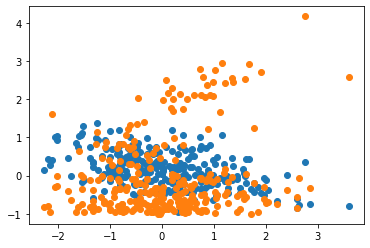

In [227]:
plt.scatter(x_test[:, 2], pred)
plt.scatter(x_test[:, 2], y_test)

In [228]:
r2_score(pred, y_test)

-4.835577898020298